In [22]:
from fbprophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
import sys
from yahoo_finance_api2 import share
from yahoo_finance_api2.exceptions import YahooFinanceError

bitcoin_aud = share.Share('BTC-AUD')
bitcoin_data = bitcoin_aud.get_historical(
    share.PERIOD_TYPE_DAY, 10,
    share.FREQUENCY_TYPE_MINUTE, 5)

In [24]:
df = pd.DataFrame(bitcoin_data)
df.head()

,timestamp,open,high,low,close,volume
0,1569766200000,11936.509766,11936.509766,11936.509766,11936.509766,0.0
1,1569766500000,11932.349609,11932.349609,11916.379883,11916.379883,38443.0
2,1569766800000,11910.639648,11910.639648,11910.639648,11910.639648,251.0
3,1569767100000,11910.639648,11910.639648,11903.650391,11903.650391,2344.0
4,1569767400000,11941.860352,11941.860352,11941.860352,11941.860352,13044.0


In [25]:
df = df.drop(['volume'], axis=1)

In [33]:
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='ms')
(df.set_index("timestamp")
   .resample('D')
   .mean()
)

,open,high,low,close
timestamp,,,,
2019-09-29,11930.236097,11937.472331,11925.222247,11932.524068
2019-09-30,12042.776408,12058.184519,12028.830400,12044.131565
2019-10-01,12533.028163,12544.449445,12520.558899,12531.685358
2019-10-02,12359.632768,12367.196467,12352.251610,12360.341255
2019-10-03,12302.164128,12309.947925,12293.876870,12301.932935
2019-10-04,12092.305003,12101.101415,12084.350027,12092.907741
2019-10-05,11998.620188,12007.116235,11990.260461,11999.093106
2019-10-06,11822.651744,11829.968933,11814.034912,11821.186595
2019-10-07,11952.140303,11962.554606,11944.009115,11954.160831


In [34]:
data = df.rename(columns={'timestamp': 'ds', 'open': 'y'})

In [36]:
m = Prophet()
m.fit(data[['ds','y']])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [39]:
future = m.make_future_dataframe(periods=1)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2865,2019-10-09 12:55:00,12118.870008,12053.400374,12183.619324
2866,2019-10-09 13:00:00,12117.763793,12047.693022,12182.381834
2867,2019-10-09 13:05:00,12116.742586,12046.852450,12180.429948
2868,2019-10-09 13:08:56,12116.004056,12046.082698,12179.945079
2869,2019-10-10 13:08:56,12079.817118,10961.609020,13185.119018


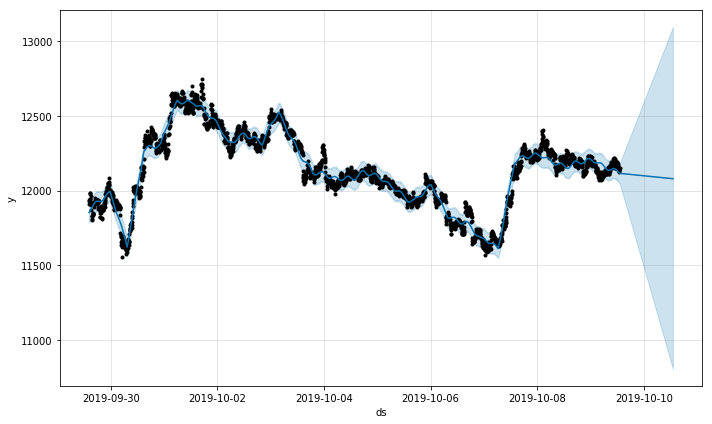

In [38]:
fig1 = m.plot(forecast)
plt.show()